In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def build_enhanced_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))  # Output layer with no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 599.4440 - mae: 22.3937 - val_loss: 380.8499 - val_mae: 17.8762
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 354.1420 - mae: 16.6783 - val_loss: 205.2687 - val_mae: 12.4006
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199.4319 - mae: 11.8118 - val_loss: 95.2967 - val_mae: 7.6055
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.7415 - mae: 8.2979 - val_loss: 46.1664 - val_mae: 4.7446
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.5546 - mae: 6.1451 - val_loss: 31.2038 - val_mae: 3.6915
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.8062 - mae: 5.4537 - val_loss: 28.6605 - val_mae: 3.6689
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.4163 - mae: 4.3947 - val_loss: 25.6493 - val_mae: 3.3963
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.7182 - mae: 4.9483 - val_loss: 24.7627 - val_mae: 3.3409
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━

In [5]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4364 - mae: 2.0685
Mean Absolute Error on test data: 2.2482597827911377


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


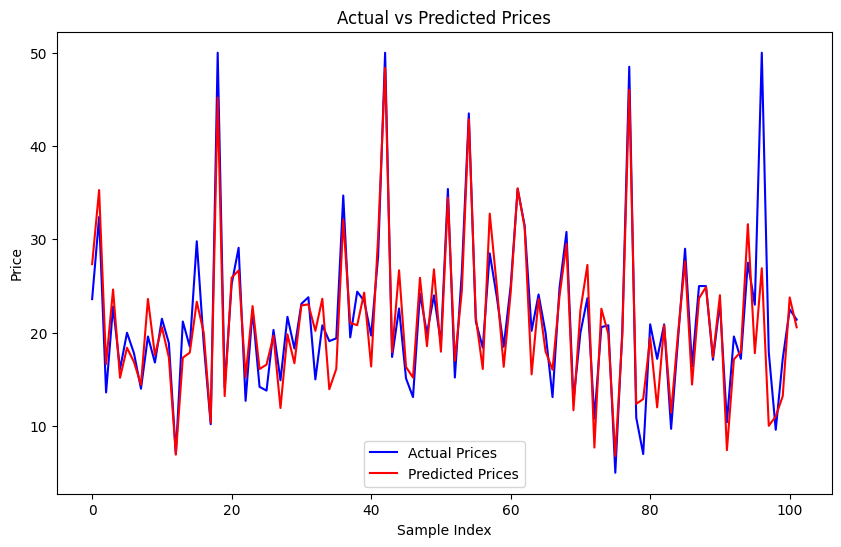

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()